In [1]:
import os
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.linear_model import Lasso
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


import ast
import operator

In [ ]:
#averaging count of words for the top article of each author
file = open("/Users/thibautvacek/inf554-2021/author_papers.txt", "r")

average_word_authors = {}


for row in file:
    author_id, papers = row.split(":")

    
    l = []
    if "-" in papers:

        for paper_id in papers.split("-"):
            if( int(paper_id) in paper_words ):
                l.append(paper_words[int(paper_id)])
    
    if l == []:
        moy = 0
    else:
        moy = np.average(np.array(l))
  
        
    average_word_authors[int(author_id)] = moy


file.close()


### Import data de base/features extraits du graph

In [10]:
# read training data
df_train = pd.read_csv('train.csv', dtype={'author': np.int64, 'hindex': np.float32})
n1_train = df_train.shape[0]
print(n1_train)
# read test data
df_test = pd.read_csv('test.csv', dtype={'author': np.int64})
n_test = df_test.shape[0]

# load the graph    
G = nx.read_edgelist('coauthorship.edgelist', delimiter=' ', nodetype=int)
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges() 
print('Number of nodes:', n_nodes)
print('Number of edges:', n_edges)


# computes structural features for each node
core_number = nx.core_number(G)



174241
Number of nodes: 217801
Number of edges: 1718164


### Utilisation des abstracts

In [3]:
import os
import pandas as pd
import numpy as np

import networkx as nx
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import torch.nn as nn
from torchtext.legacy import data, datasets

import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import ast
from tqdm import tqdm_notebook as tqdm

In [4]:
n_features = 2
n_features_text = 1000
n_reduced_features = 10

#### Utlisation de la mesure "TF-iDF" pour calculer la pertinence d'un mot

In [6]:
stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
vectorizer = TfidfVectorizer(max_features=n_features_text, stop_words=stop)
X = vectorizer.fit_transform(textes)


#### Effectuons une PCA pour réduire le nimbre de features

In [8]:
X_text = X.toarray()
pca = PCA(n_components=n_reduced_features)
X_text_reduced = pca.fit_transform(X_text)

### Creation de la matrice d'enraînement

In [13]:
# computes structural features for each node
core_number = nx.core_number(G)

# create the training matrix. each node is represented as a vector of 3 features:
# (1) its number of documents, (2) its core number , 
#X_train = np.zeros((n_train, n_features + n_reduced_features))
#y_train = np.zeros(n_train)
for i,row in df_train.iterrows():
    break
    node = row['author']


    X_train[i, 0] = core_number[node]
    X_train[i, 1] = G.degree(node)
    X_train[i, n_features: n_features+n_reduced_features] = X_text_reduced[author_to_id[node]]
    
    y_train[i] = row['hindex']

### Data creation/ Creation de la matrice d'enraînement

In [11]:

# create the training matrix. each node is represented as a vector of 3 features:
# (1) its degree, (2) its core number 
n_train = int((n1_train*8)//10)
print(n_train)
n_validation = n1_train - n_train
print(n_validation)

X_train = np.zeros((n_train, n_features + n_reduced_features))
y_train = np.zeros(n_train)
data_train = np.zeros((n_train,n_features + n_reduced_features+1))

X_validation = np.zeros((n_validation, n_features + n_reduced_features))
y_validation = np.zeros(n_validation)
data_test = np.zeros((n_validation,n_features + n_reduced_features+1))


for i,row in df_train.iterrows():
    node = row['author']
    if i<n_train : 
        X_train[i,0] = G.degree(node)
        X_train[i,1] = core_number[node]
        X_train[i, n_features: n_features+n_reduced_features] = X_text_reduced[author_to_id[node]]
        y_train[i] = row['hindex']
        data_train[i] = np.concatenate(([X_train[i,0],X_train[i,1]],X_train[i, n_features: n_features+n_reduced_features],[y_train[i]]))
    if i>n_train : 
        X_validation[i-n_train,0] = G.degree(node)
        X_validation[i-n_train,1] = core_number[node]
        X_validation[i-n_train, n_features: n_features+n_reduced_features] = X_text_reduced[author_to_id[node]]
        y_validation[i-n_train] = row['hindex']
        data_test[i-n_train] =  np.concatenate(([X_validation[i-n_train,0],X_validation[i-n_train,1]],X_validation[i-n_train, n_features: n_features+n_reduced_features],[y_validation[i-n_train]]))

a = np.max(y_validation)
b = np.max(y_train)
norma = max(a,b)
print(norma)
#y_train /= norma
#y_validation /= norma


# create the test matrix. each node is represented as a vector of 3 features:
# (1) its degree, (2) its core number
X_test = np.zeros((n_test, n_features + n_reduced_features))
for i,row in df_test.iterrows():
    node = row['author']
    X_test[i,0] = G.degree(node)
    X_test[i,1] = core_number[node]
    X_test[i, n_features: n_features+n_reduced_features] = X_text_reduced[author_to_id[node]]



print(np.max(y_train))

139392
34849
187.0
187.0


### Cross validation

In [15]:
# create the training matrix. each node is represented as a vector of 3 features:
# (1) its degree, (2) its core number 
n_train = int((n1_train//3))
print(n1_train-2*n_train)

X_train1 = np.zeros((n_train, n_features + n_reduced_features))
y_train1 = np.zeros(n_train)
data_train1 = np.zeros((n_train,n_features + n_reduced_features+1))

X_train2 = np.zeros((n_train, n_features + n_reduced_features))
y_train2 = np.zeros(n_train)
data_train2 = np.zeros((n_train,n_features + n_reduced_features+1))
              
X_train3 = np.zeros((n1_train-2*n_train, n_features + n_reduced_features))
y_train3 = np.zeros(n1_train-2*n_train)
data_train3 = np.zeros((n1_train-2*n_train,n_features + n_reduced_features+1))
              
        
for i,row in df_train.iterrows():
    node = row['author']
    if i<n_train : 
        X_train1[i,0] = G.degree(node)
        X_train1[i,1] = core_number[node]
        X_train1[i, n_features: n_features+n_reduced_features] = X_text_reduced[author_to_id[node]]
        y_train1[i] = row['hindex']
        data_train1[i] = np.concatenate(([X_train1[i,0],X_train1[i,1]],X_train1[i, n_features: n_features+n_reduced_features],[y_train1[i]]))
    if n_train*2>i>n_train : 

        X_train2[i-n_train,0] = G.degree(node)
        X_train2[i-n_train,1] = core_number[node]
        X_train2[i-n_train, n_features: n_features+n_reduced_features] = X_text_reduced[author_to_id[node]]
        y_train2[i-n_train] = row['hindex']
        data_train2[i-n_train] = np.concatenate(([X_train2[i-n_train,0],X_train2[i-n_train,1]],X_train2[i-n_train, n_features: n_features+n_reduced_features],[y_train2[i-n_train]]))
    if 2*n_train<i : 

        X_train3[i-2*n_train,0] = G.degree(node)
        X_train3[i-2*n_train,1] = core_number[node]
        X_train3[i-2*n_train, n_features: n_features+n_reduced_features] = X_text_reduced[author_to_id[node]]
        y_train3[i-2*n_train] = row['hindex']
        data_train3[i-2*n_train] = np.concatenate(([X_train3[i-2*n_train,0],X_train3[i-2*n_train,1]],X_train3[i-2*n_train, n_features: n_features+n_reduced_features],[y_train3[i-2*n_train]]))



              
              
              
            
# create the test matrix. each node is represented as a vector of 3 features:
# (1) its degree, (2) its core number
X_test = np.zeros((n_test, n_features + n_reduced_features))
for i,row in df_test.iterrows():
    node = row['author']
    X_test[i,0] = G.degree(node)
    X_test[i,1] = core_number[node]
    X_test[i, n_features: n_features+n_reduced_features] = X_text_reduced[author_to_id[node]]





58081


### Visualisation des données

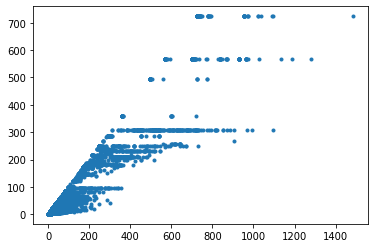

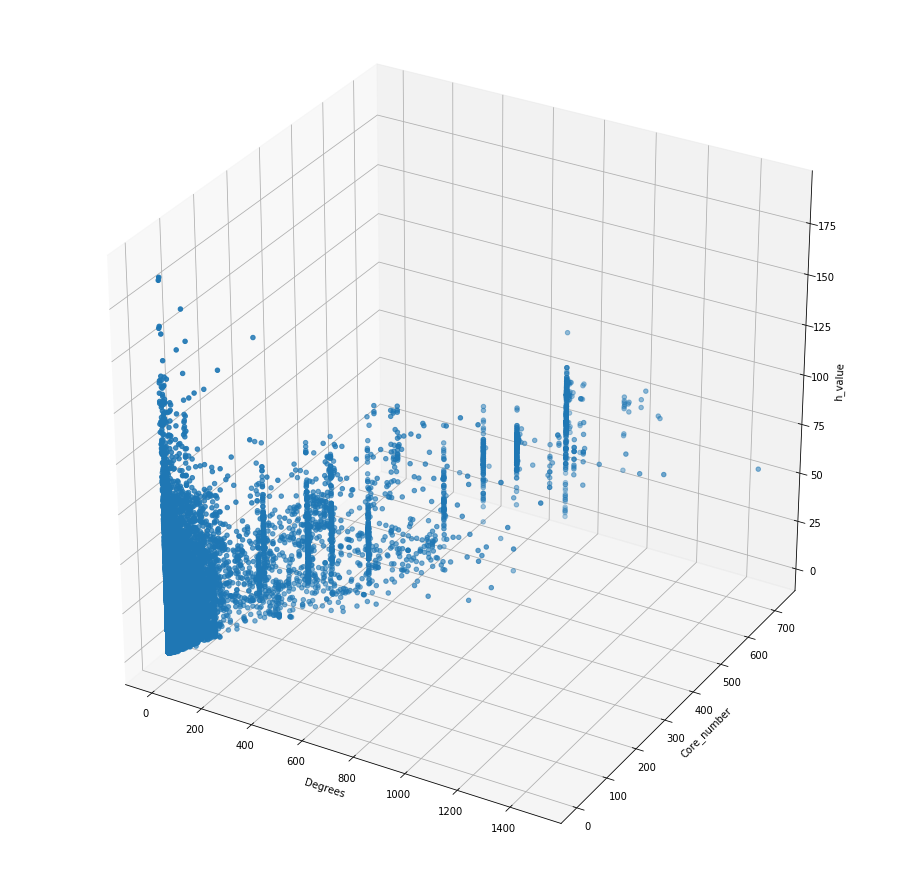

In [17]:
plt.plot(X_train[:,0],X_train[:,1],'.')
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train[:])
ax.set_xlabel('Degrees')
ax.set_ylabel('Core_number')
ax.set_zlabel(r'h_value')

plt.show()

### Mise en place des données


### Neural Network

In [27]:
#device config
#device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

#hyper parameters
input_size = n_features + n_reduced_features
hidden_size = 16
#hidden_dim = 10
output_size = 1
num_epochs = 200
batch_size = 60
lr = 0.000001

print(input_size)

12


In [30]:


train_loader1 = torch.utils.data.DataLoader(dataset = data_train, batch_size = batch_size, shuffle = True)
test_loader1 = torch.utils.data.DataLoader(dataset = data_test, batch_size = batch_size, shuffle = False)



In [31]:
class NeuralNet(nn.Module):
    def __init__(self , input_size , hidden_size,output_size):
        super(NeuralNet,self).__init__()
        
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.lsigm = nn.LogSigmoid()
        
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l22 = nn.Linear(hidden_size, hidden_size)
        self.l23 = nn.Linear(hidden_size, hidden_size)
        self.l24 = nn.Linear(hidden_size, hidden_size)
        self.l25 = nn.Linear(hidden_size, hidden_size)
        self.fcdp = nn.Dropout(p=0.8, inplace=False)
        self.l4 = nn.Linear(hidden_size, output_size)
        
        
    
    def forward(self, x):
        x = x.type(torch.FloatTensor)
        out = self.l1(x)
        out = self.tanh(out)
        
        out = self.l2(out)
        out = self.relu(out)
        
      
            
        out = self.l4(out)


            
        return out
    
    
model = NeuralNet(input_size, hidden_size,output_size)
#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
#training loop1
n_total_steps = len(train_loader1)


for epoch in range(num_epochs):
    
   
    for i, auteur in enumerate(train_loader1):
        #print(auteur.shape)
        optimizer.zero_grad()
        
        features = auteur[:,:n_features + n_reduced_features]
        labels = auteur[:,n_features + n_reduced_features]
        
        # forward
        outputs = model(features) 
        
        #print(outputs, labels)
        loss = criterion(outputs.view(-1), labels.type(torch.FloatTensor))

        #loss = criterion(outputs.view(-1), labels)
        #loss = loss.type(torch.FloatTensor)
        #print(loss)
        
        #backwards
        
        loss.backward()
        optimizer.step()
        

        
       # if (i+1) % 1000 ==0:
          #  print(f'epoch {epoch + 1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():4f}')
       
    
    
    #test
    with torch.no_grad() :
        error = 0
        nb_samples = 0
        
        for i, auteur in enumerate(test_loader1):

            #print(auteur)
            features = auteur[:,:n_features + n_reduced_features]
            labels = auteur[:,n_features + n_reduced_features]
            outputs = model(features)
            
            # value, index
            nb_samples += labels.shape[0]
            error += criterion(outputs.view(-1),labels)*labels.shape[0]
  
            


        print( epoch ,' ', error/nb_samples) 


         

0   tensor(116.9703, dtype=torch.float64)
1   tensor(116.7068, dtype=torch.float64)
2   tensor(116.4511, dtype=torch.float64)
3   tensor(116.1941, dtype=torch.float64)
4   tensor(115.9348, dtype=torch.float64)
5   tensor(115.6773, dtype=torch.float64)
6   tensor(115.4199, dtype=torch.float64)
7   tensor(115.1606, dtype=torch.float64)
8   tensor(114.8947, dtype=torch.float64)
9   tensor(114.6073, dtype=torch.float64)
10   tensor(114.3211, dtype=torch.float64)
11   tensor(114.0368, dtype=torch.float64)
12   tensor(113.7450, dtype=torch.float64)
13   tensor(113.4392, dtype=torch.float64)
14   tensor(113.0691, dtype=torch.float64)
15   tensor(112.7480, dtype=torch.float64)
16   tensor(112.4385, dtype=torch.float64)
17   tensor(112.1280, dtype=torch.float64)
18   tensor(111.8139, dtype=torch.float64)
19   tensor(111.4972, dtype=torch.float64)
20   tensor(111.1750, dtype=torch.float64)
21   tensor(110.8359, dtype=torch.float64)
22   tensor(110.5012, dtype=torch.float64)
23   tensor(110.1629,

In [ ]:
y_pred = model(torch.tensor(X_test).float())

In [254]:
y_pred.detach().numpy()[:,0]

array([ 5.5569825, 11.097355 , 16.776873 , ...,  8.821979 , 11.970889 ,
       13.844024 ], dtype=float32)

In [239]:
import pandas as pd

In [255]:
df_test = pd.read_csv('test.csv', dtype={'author': np.int64})
# write the predictions to file

df_test['hindex'] = pd.Series(np.round_(y_pred.detach().numpy()[:,0], decimals=3))


df_test.loc[:,["author","hindex"]].to_csv('submission.csv', index=False)